## Inicializacao

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *
from methods.utils.utilities import *

dataTank = pd.read_csv('data/coupletanks.csv')
u = np.reshape(np.array(dataTank['u']), (1,2401))
y = np.array(dataTank[['tank1', 'tank2']].T)

## Selecao de estrutura

In [2]:
'''Na = [4]#[12]
Nb = [0,2]#[2, 2]
level = 1
fn = [0,0,0,0,0]
root=True
d = 0'''

output = 1
params = []
params.append({'nb':[2,2],'na':[12], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':True, 'delay':8})
params.append({'nb':[0,2],'na':[1], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':True, 'delay':0})

sselector = structureSelector()
ss = sselector.symbolic_regressors(**params[output])
#print(ss, ss.shape)

vCandidatos = sselector.matrix_candidate(u, y, **params[output])
#print(vCandidatos.shape)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, y[output, pad:], 5, 0.00001)
theta = LSM(y[output, pad:], psi)
model = ss[selected]
print(model, theta)

[sqrtM(Y1.1), sqrtM(Y2.1), sqrtM(U1.1)] [1 Y2.1 Y2.2 U1.1 sqrtM(Y1.1) sqrtM(Y2.1) sqrtM(U1.1)]
[Y2.1 Y2.2 sqrtM(Y1.1) 1 sqrtM(Y2.1)] [ 0.66020348  0.33451943  0.054832   -0.05226161 -0.02333888]


In [ ]:
from sympy import Function
class versin(Function):
   @classmethod
   def eval(cls, x):
       if x.is_Number:
           #print('ok')
           return 2**x

### Simulação

[0.0299529968946266 0 0.825669552134328 1 0.173069341290208]
0.173069341290208 <class 'sympy.core.numbers.Float'>
[0.00874733204373294 0.0299529968946266 0.957114417056977 1
 0.0935271727560121]
0.0935271727560121 <class 'sympy.core.numbers.Float'>
[0.0138309476063298 0.00874733204373294 1.00160306311833 1
 0.117605049238244]
0.117605049238244 <class 'sympy.core.numbers.Float'>
[0.0119709119972099 0.0138309476063298 1.01765061354406 1
 0.109411662985305]
0.109411662985305 <class 'sympy.core.numbers.Float'>
[0.0135146219299569 0.0119709119972099 1.01886091732229 1
 0.116252406125451]
0.116252406125451 <class 'sympy.core.numbers.Float'>
[0.0138182746346299 0.0135146219299569 1.02400150671505 1
 0.117551157521438]
0.117551157521438 <class 'sympy.core.numbers.Float'>
[0.0147867055665586 0.0138182746346299 1.03520726932176 1
 0.121600598545232]
0.121600598545232 <class 'sympy.core.numbers.Float'>
[0.0160475697090325 0.0147867055665586 1.05308576217241 1
 0.126679002636714]
0.126679002636714

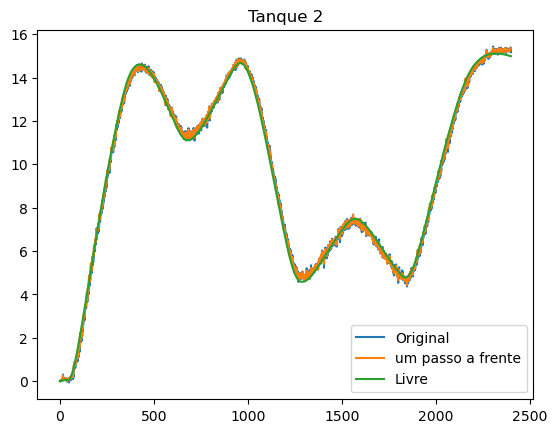

In [3]:
slivre = sselector.predict(u, y, theta, ss[selected], params[output]['nb'], params[output]['na'], output)

plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(psi @ theta, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

## Validação

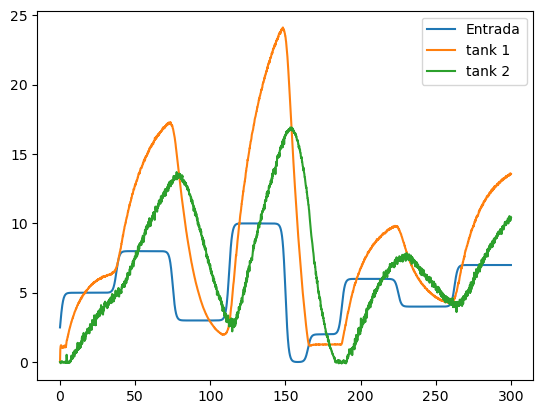

In [4]:
mat_content1 = sc.loadmat("data/ct1e1.mat")
mat_content2 = sc.loadmat("data/ct1e2.mat")

tanque1 = mat_content1['Tanque1']
tanque2 = mat_content2['Tanque2']

t1 = tanque1['time'][0][0]
v1 = tanque1['signals'][0][0]['values'][0][0]

t2 = tanque2['time'][0][0]
v2 = tanque2['signals'][0][0]['values'][0][0]

input = pd.read_csv('data/einput.csv')
t = input['t']
uVal = np.array(input['v']).reshape((1,-1))

plt.plot(t, uVal.T, label='Entrada')
plt.plot(t1, v1, label="tank 1")
plt.plot(t2, v2, label="tank 2")
plt.legend()
plt.show()

[0 0 0.819844650110874 1 0]
0 <class 'sympy.core.numbers.Zero'>
[-0.00730788726685515 0 0.955250622206251 1 0]
0 <class 'sympy.core.numbers.Zero'>
[-0.00470799980760069 -0.00730788726685515 1.01991329548276 1 0]
0 <class 'sympy.core.numbers.Zero'>
[-0.00189059178425518 -0.00470799980760069 1.06115814315229 1 0]
0 <class 'sympy.core.numbers.Zero'>
[0.00310072108967462 -0.00189059178425518 1.06264749714702 1
 0.0556841188282136]
0.0556841188282136 <class 'sympy.core.numbers.Float'>
[0.00612054028979515 0.00310072108967462 1.09866992440594 1
 0.0782338819808601]
0.0782338819808601 <class 'sympy.core.numbers.Float'>
[0.0112328220635729 0.00612054028979515 1.10311247152516 1
 0.105985008673741]
0.105985008673741 <class 'sympy.core.numbers.Float'>
[0.0152140700256413 0.0112328220635729 1.09604952293506 1
 0.123345328349481]
0.123345328349481 <class 'sympy.core.numbers.Float'>
[0.0187602153933168 0.0152140700256413 1.07127206247783 1
 0.136967935639392]
0.136967935639392 <class 'sympy.core.nu

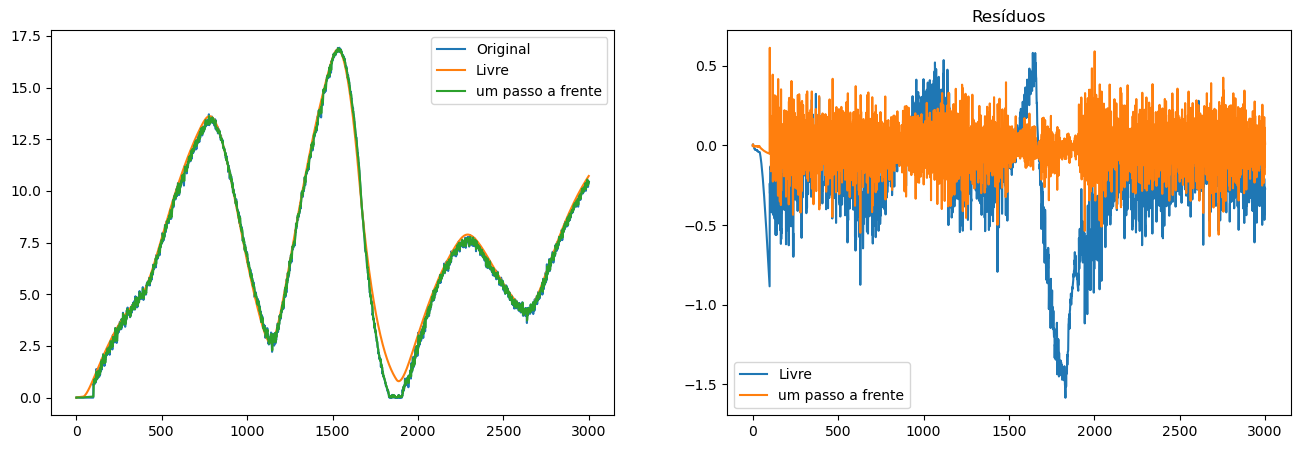

In [5]:
v1[v1 < 0] = 0
v2[v2 < 0] = 0
v2[:100] = 0
yVal = np.vstack((v1.T, v2.T))

z = np.zeros(yVal.shape)
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)

print("Modelo selecionado:")
pprint( model @ theta)

f, ax = plt.subplots(1,2, figsize=[16,5])

ax[0].plot(yVal[output].T, label='Original')
ax[0].plot(valLivre, label='Livre')
ax[0].plot(yhat, label='um passo a frente')
ax[1].set_title("Simulações")
ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - yhat, label='um passo a frente')
ax[1].set_title("Resíduos")
ax[1].legend()
plt.show()

In [6]:
def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))), 5)
    print('MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')
    cc = np.corrcoef(y, yest)
    #print("Correlation pearson:", np.mean(cc))

print("\nSimulação livre")
metrics(yVal[output], valLivre)
print("\nUm passo a frente")
metrics(yVal[output], yhat)


Simulação livre
MSE: 0.15912362783725145 
AET: 861.2518842075941 
MAPE: 0.11851%

Um passo a frente
MSE: 0.01944900307093239 
AET: 319.2862618215755 
MAPE: 0.0831%
